In [ ]:
%%html
<style>
    /* identifier les reponse aux questions */
    .comment {
        color:blue;
    }
    
    /* utilitaire pour faire des colonnes */
    .column {
        float:left;
        width:50%;
    }
</style>

# Dataset
[Plant Village](https://data.mendeley.com/datasets/tywbtsjrjv/1)

## Description

In this data-set, 39 different classes of plant leaf and background images are available. The data-set containing 61,486 images. We used six different augmentation techniques for increasing the data-set size. The techniques are image flipping, Gamma correction, noise injection, PCA color augmentation, rotation, and Scaling.

The classes are: 

<br>

<div class="column">
m
1. Apple_scab
2. Apple_black_rot
3. Apple_cedar_apple_rust
4. Apple_healthy
5. Background_without_leaves
6. Blueberry_healthy
7. Cherry_powdery_mildew
8. Cherry_healthy
9. Corn_gray_leaf_spot
10. Corn_common_rust
11. Corn_northern_leaf_blight
12. Corn_healthy
13. Grape_black_rot
14. Grape_black_measles
15. Grape_leaf_blight
16. Grape_healthy
17. Orange_haunglongbing
18. Peach_bacterial_spot
19. Peach_healthy
20. Pepper_bacterial_spot

</div>

<div class="column">
    
21. Pepper_healthy
22. Potato_early_blight
23. Potato_healthy
24. Potato_late_blight
25. Raspberry_healthy
26. Soybean_healthy
27. Squash_powdery_mildew
28. Strawberry_healthy
29. Strawberry_leaf_scorch
30. Tomato_bacterial_spot
31. Tomato_early_blight
32. Tomato_healthy
33. Tomato_late_blight
34. Tomato_leaf_mold
35. Tomato_septoria_leaf_spot
36. Tomato_spider_mites_two-spotted_spider_mite
37. Tomato_target_spot
38. Tomato_mosaic_virus
39. Tomato_yellow_leaf_curl_virus
    
</div>

In [1]:
%matplotlib inline

#
# import utilitaires
#
import cv2
import h5py
import numpy as np
import pandas as pd
import random
import seaborn as sns

from dataset_helpers.MetaObject import MetaObject
from dataset_helpers.PlantVillage import PlantVillageConfig, plant_village_load
from jupyter_helpers import display_html
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

# faire en sorte que random soit deterministe
random.seed(42)

In [2]:
#
# configurer les divers processus
#
pv_config = PlantVillageConfig()

config_overrides = MetaObject.from_json("config_overrides.json")
if not config_overrides is None:
    MetaObject.override_from_object(pv_config, 
                                    config_overrides.dataset)

In [3]:
#
# obtenir le dataset PlantVillage
#
pv_dataset = plant_village_load(pv_config)
if pv_dataset is None:
    display_html(f"<b>Invalid dataset</b>")
else:
    pv_h5 = pv_dataset.h5_file
    pv_dataframe = pd.DataFrame(pv_dataset.data)

# Exploration

In [4]:
display_html(f"<b>{pv_config.install_path}</b> - data {pv_dataframe.shape}")
display(pv_dataframe.head(5))

,species,disease,image_path,thumbnail_path,label
0,Apple,Apple_scab,images/Apple___Apple_scab/image (1).JPG,thumbnails/Apple___Apple_scab/image (1).JPG,Apple_scab
1,Apple,Apple_scab,images/Apple___Apple_scab/image (104).JPG,thumbnails/Apple___Apple_scab/image (104).JPG,Apple_scab
2,Apple,Apple_scab,images/Apple___Apple_scab/image (10).JPG,thumbnails/Apple___Apple_scab/image (10).JPG,Apple_scab
3,Apple,Apple_scab,images/Apple___Apple_scab/image (1000).JPG,thumbnails/Apple___Apple_scab/image (1000).JPG,Apple_scab
4,Apple,Apple_scab,images/Apple___Apple_scab/image (103).JPG,thumbnails/Apple___Apple_scab/image (103).JPG,Apple_scab


In [5]:
display_html(f"<b>{pv_config.install_path}</b> - info")
pv_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60343 entries, 0 to 60342
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   species         60343 non-null  object
 1   disease         60343 non-null  object
 2   image_path      60343 non-null  object
 3   thumbnail_path  60343 non-null  object
 4   label           60343 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [6]:
species = pv_dataframe["species"].unique()
species.sort()
display_html(f"<b>Modalites de 'species'</b> - count: {species.size}")
display(list(species))

['Apple',
 'Blueberry',
 'Cherry',
 'Corn',
 'Grape',
 'Orange',
 'Peach',
 'Pepper,_bell',
 'Potato',
 'Raspberry',
 'Soybean',
 'Squash',
 'Strawberry',
 'Tomato']

In [7]:
labels = pv_dataframe["label"].unique()
labels.sort()
display_html(f"<b>Modalites de 'label'</b> - count: {len(labels)}")
display(list(labels))

['Apple_Black_rot',
 'Apple_Cedar_apple_rust',
 'Apple_healthy',
 'Apple_scab',
 'Blueberry_healthy',
 'Cherry_Powdery_mildew',
 'Cherry_healthy',
 'Corn_Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_Common_rust',
 'Corn_Northern_Leaf_Blight',
 'Corn_healthy',
 'Grape_Black_rot',
 'Grape_Esca_(Black_Measles)',
 'Grape_Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape_healthy',
 'Orange_Haunglongbing_(Citrus_greening)',
 'Peach_Bacterial_spot',
 'Peach_healthy',
 'Pepper,_bell_Bacterial_spot',
 'Pepper,_bell_healthy',
 'Potato_Early_blight',
 'Potato_Late_blight',
 'Potato_healthy',
 'Raspberry_healthy',
 'Soybean_healthy',
 'Squash_Powdery_mildew',
 'Strawberry_Leaf_scorch',
 'Strawberry_healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites Two-spotted_spider_mite',
 'Tomato_Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato_healthy',
 'Tomato_mosaic_virus']

<font class="comment">

**Notes**
* Background_without_leaves a ete intentionelment enleve
* les labels semblent avoir evolues par rapport a la liste cite ci-haut

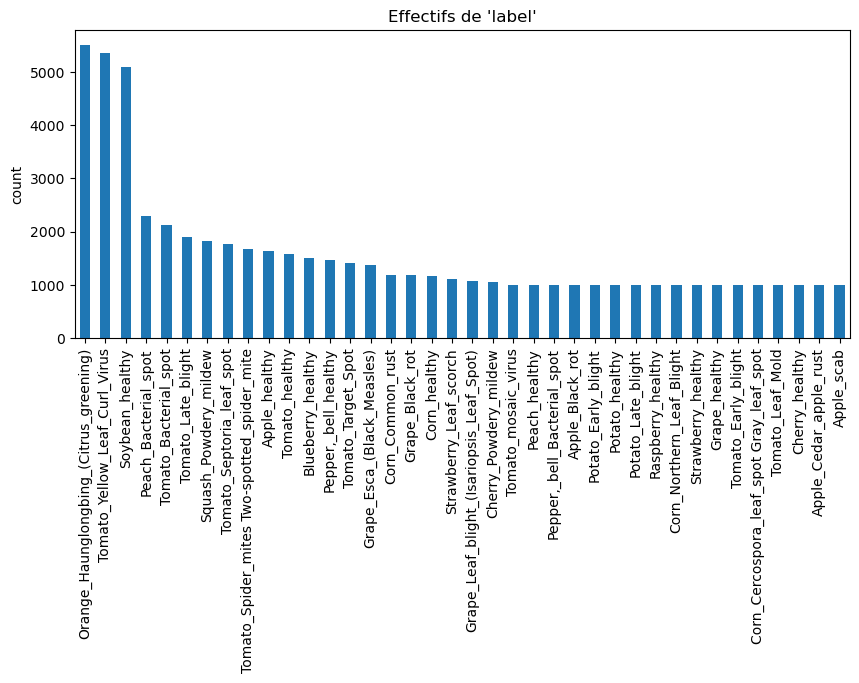

In [8]:
#
# distribution de label
#
FIGSIZE = (10, 4)

disease_count = pv_dataframe["label"].value_counts()
disease_count.sort_values(inplace=True, ascending=False)

plt.figure(figsize=FIGSIZE)
disease_count.plot.bar(title="Effectifs de 'label'",
                       ylabel="count")
plt.show()

In [9]:
#
# relation species/label
#
doi = pv_dataframe[["label", "species"]]

disease_samples_per_species = doi.groupby("species").count()
disease_samples_per_species.sort_values("label", inplace=True, ascending=False)

In [10]:
healthy_crit = doi["label"].str.contains("healthy")

healthy = doi[healthy_crit]
healthy = healthy \
            .groupby("species") \
            .count() \
            .rename(columns={"label": "healthy"})

not_healthy = doi[ ~healthy_crit ]
not_healthy = not_healthy \
                .groupby("species") \
                .count() \
                .rename(columns={"label": "autres"})

healthy_vs_other_per_species = pd.merge(healthy, 
                                        not_healthy,
                                        how="outer",
                                        on="species")

# for ease of comparison, keep same order 
# as disease_samples_per_species
healthy_vs_other_per_species = healthy_vs_other_per_species \
                                   .reindex(disease_samples_per_species \
                                   .index.to_list())

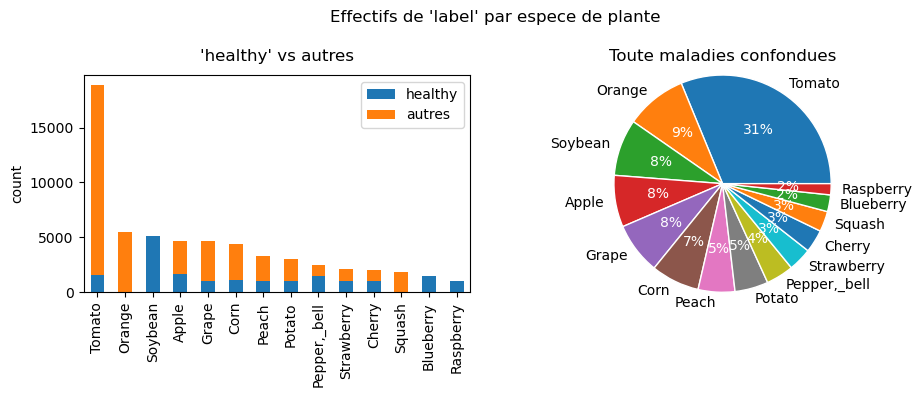

In [11]:
fig = plt.figure(figsize=FIGSIZE)
fig.suptitle("Effectifs de 'label' par espece de plante")

# plt.subplot(121)
# disease_samples_per_species.plot.bar(ax=plt.gca(),
#                                      xlabel="",
#                                      ylabel="count",
#                                      legend=False)

plt.subplot(121)
healthy_vs_other_per_species.plot.bar(ax=plt.gca(),
                                      stacked=True, 
                                      xlabel="",
                                      ylabel="count")
plt.title("'healthy' vs autres", y=1.025)

plt.subplot(122)
_, _, pcts = plt.pie(x=disease_samples_per_species.values.flatten(),
                     labels=disease_samples_per_species.index.values,
                     autopct='%.0f%%',
                     radius=1.25,
                     wedgeprops={'linewidth': 1.0, 
                                 'edgecolor': 'white'})
plt.title("Toute maladies confondues", y=1.025)
plt.setp(pcts, color='white')

plt.tight_layout()
plt.show()

In [12]:
def load_image(path):
    return pv_h5[path][...]

In [13]:
#
# visualize some images
#
SAMPLEs_GRID = (2, 7)

# select some random samples
sample_indices = random.sample(range(pv_dataframe.shape[0]), 
                               SAMPLEs_GRID[0] * SAMPLEs_GRID[1])
sample_indices.sort() 

samples = pv_dataframe.loc[sample_indices].copy()

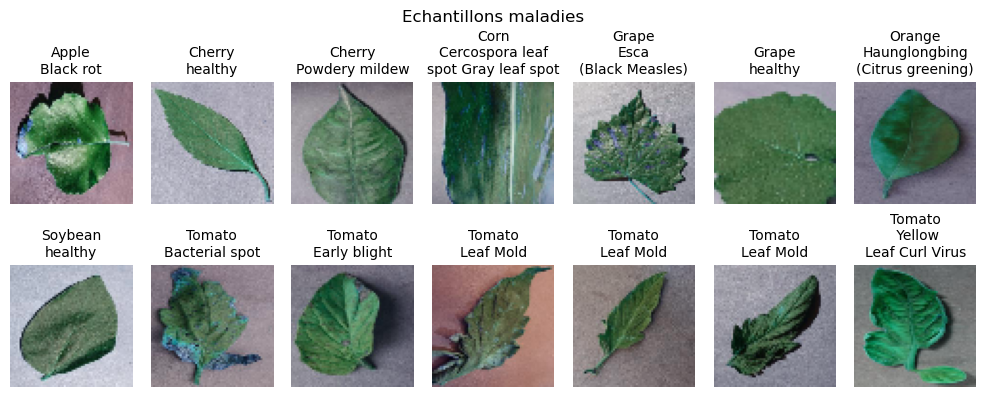

In [14]:
samples["thumbnail"] = samples["thumbnail_path"].apply(load_image)

fig = plt.figure(figsize=FIGSIZE)
fig.suptitle("Echantillons maladies")

for i, (_, sample) in enumerate(samples.iterrows()):
    plt.subplot(SAMPLEs_GRID[0], SAMPLEs_GRID[1], i + 1)
    plt.axis("off")
    
    # adjust title: some disease have very long name
    species = sample['species']
    disease = sample['disease'].replace(species, "")
    disease = disease.split("_") 
    count = len(disease) 
    if count > 2:
        count //= 2
        disease0 = " ".join(disease[:count])
        disease1 = " ".join(disease[count:])
        disease = f"{disease0}\n{disease1}"
    else:
        disease = " ".join(disease)
    
    plt.title(f"{species}\n{disease}")    
    plt.imshow(sample["thumbnail"])
    plt.gca().title.set_size(10)

plt.tight_layout()
fig.subplots_adjust(hspace=0.5, top=0.8)
plt.show()

# Modelisation

Mettre un peu de bla bla pour justifier ce qu'on fait, citer les papiers et tout

**TODO**
* Train/test split
* Pipeline de traitement - Bag of Visual Words
    * Rescale en 256x256?
    * Remapper 0/1 et float
    * Threshold background/foreground    
    * Slicer les images
    * Detecter les features via SIFT/ORB
    * Passer dans un KMean
    * Mettre le tout dans notre dictionnaire

* Passer test data dans pipeline
    * Sparse vector pour une image non connue
    * Identifier avec K Nearest Neighboor

In [15]:
#
# split train/test
#
train, test = train_test_split(pv_dataframe, 
                               train_size=0.8, 
                               random_state=42, 
                               stratify=pv_dataframe["label"])

In [16]:
# validation split size
display_html(f"<b>Dataset:</b> <font style='color:red;'>{pv_dataframe.size}</font>, "
             f"<b>Train:</b> <font style='color:red;'>{train.size}</font>, "
             f"<b>Test:</b> <font style='color:red;'>{test.size}</font> "
              "- 80% / 20% split")

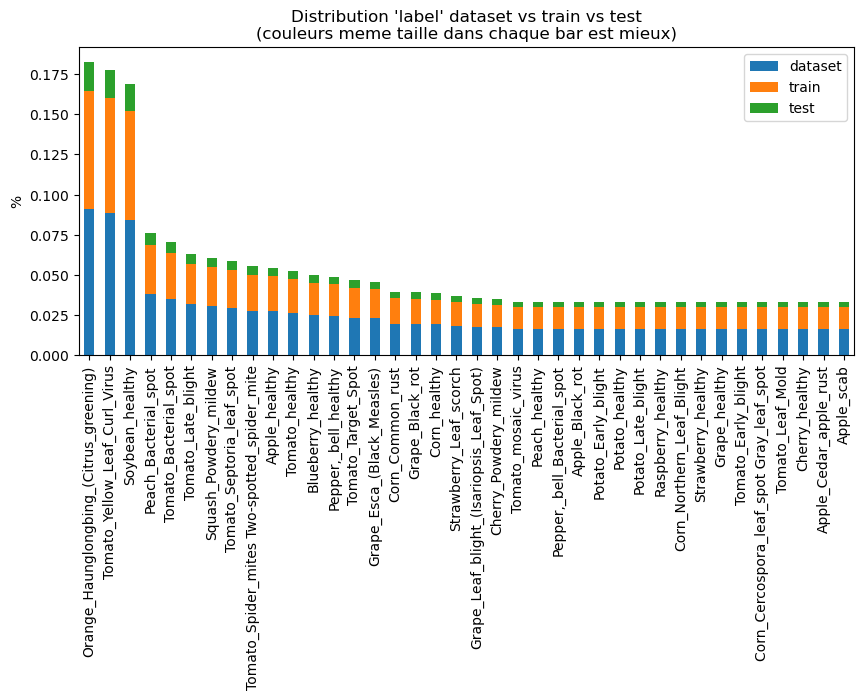

In [17]:
# validation split distribution
size = pv_dataframe.shape[0]
frequencies = pd.DataFrame({"dataset": disease_count / size,
                            "train": train["label"].value_counts() / size,
                            "test": test["label"].value_counts() / size})
frequencies = frequencies.reindex(index=disease_count.index.to_list())

plt.figure(figsize=FIGSIZE)
frequencies.plot.bar(ax=plt.gca(),
                     stacked=True,
                     title="Distribution 'label' dataset vs train vs test\n"
                           "(couleurs meme taille dans chaque bar est mieux)",
                     ylabel="%")
plt.show()

In [18]:
#
# construire les features
#
desc_factory = cv2.ORB_create()
feature_list = np.empty((0, 32), dtype=np.uint8)

progress = tqdm(iterable=pv_dataframe.iterrows(),
                total=pv_dataframe.shape[0])

for index, row in progress:
    image_path = row["image_path"] #row["thumbnail_path"] #
    # image = load_image(image_path)

    # # tiling irait ici
    # # detection backgroud irait ici
    # _, descs = desc_factory.detectAndCompute(image, None)
    # if descs is None:
    #     continue
    
    # feature_list = np.append(feature_list, descs, axis=0)
    
#     if index > 100:
#         break

# with open('descs.pkl', 'wb') as f:
#     pickle.dump(list(feature_list), f)
    
# save the data to hdf5
print(pv_dataframe.shape[0])
print(feature_list.shape)

  0%|          | 0/60343 [00:00<?, ?it/s]

60343
(0, 32)


# Evaluation

* Entrainement avec les stats